In [52]:
import numpy as np
from scipy.stats import powerlaw, norm, uniform, poisson
import matplotlib.pyplot as plt
%matplotlib inline  

In [114]:
a0 = 2
a1 = 1
mean0, var0, skew0, kurt0 = powerlaw.stats(a0, moments='mvsk')
mean1, var1, skew1, kurt1 = powerlaw.stats(a1, moments='mvsk')
print(mean0, var0, skew0, kurt0)
print(mean1, var1, skew1, kurt1)

0.6666666666666666 0.05555555555555555 -0.5656854249492381 -0.6
0.5 0.08333333333333333 -0.0 -1.2


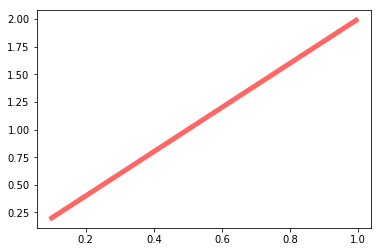

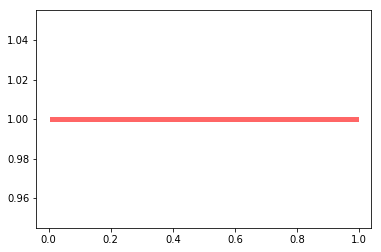

In [96]:
x = np.linspace(powerlaw.ppf(0.01, a0),powerlaw.ppf(0.99, a0), 100)
plt.plot(x, powerlaw.pdf(x, a0), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

x = np.linspace(powerlaw.ppf(0.01, a1),powerlaw.ppf(0.99, a1), 100)
plt.plot(x, powerlaw.pdf(x, a1), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

In [107]:
#Generate Training Data 

Ntrain = 10000                                   #training set
K = 1                              #sum of K random variables

mean_diff = 5

s0 = np.zeros(Ntrain)
s1 = np.zeros(Ntrain)

c0 = np.zeros(Ntrain)
c1 = np.zeros(Ntrain)
for i in range(Ntrain):
    s0[i] = np.sum(powerlaw.rvs(a0, size=K))               #Observation for hypothesis 0
    s1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1
    
    #s0[i] = np.sum(poisson.rvs(40, size=K))
    #s1[i] = np.sum(poisson.rvs(4, size=K))

c0 = (s0 - np.mean(s0))/np.std(s0)                         #normalized random variable
c1 = (s1 - np.mean(s1))/np.std(s1)                         #normalized random variable

#c0 = (s0 - K*mean0)/np.sqrt(K*var0)                         
#c1 = (s1 - K*mean1)/np.sqrt(K*var1)                        
c0 = mean_diff + c0                                        # add mean to c0

In [108]:
# Generate Test data

Ntest = 100000

test_s0 = np.zeros(Ntest)
test_s1 = np.zeros(Ntest)

test_c0 = np.zeros(Ntest)
test_c1 = np.zeros(Ntest)
for i in range(Ntest):
    test_s0[i] = np.sum(powerlaw.rvs(a0, size=K))              #Observation for hypothesis 0
    test_s1[i] = np.sum(powerlaw.rvs(a1, size=K))              #Observation hypothesis 1 
    
    #test_s0[i] = np.sum(poisson.rvs(40, size=K))
    #test_s1[i] = np.sum(poisson.rvs(4, size=K))

test_c0 = (test_s0 - np.mean(test_s0))/(np.std(test_s0))       
test_c1 = (test_s1 - np.mean(test_s1))/(np.std(test_s1))

#test_c0 = (test_s0 - K*mean0)/(np.sqrt(K*var0)) 
#test_c1 = (test_s1 - K*mean1)/(np.sqrt(K*var1))

test_c0 = mean_diff + test_c0                                 # add mean to c0

Hypothesis 0
Mean Normalized sum = 5.0
Variance Normalized sum = 0.9999999999999996
Hypothesis 1
Mean Normaliized Sum = 1.4921397450962105e-16
Variance Normalized sum = 1.0


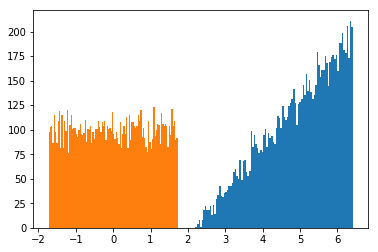

In [109]:

print("Hypothesis 0")
print("Mean Normalized sum = {}".format(e_mean0))
print("Variance Normalized sum = {}".format(e_var0))

#print("Mean of Sum = {}, Normalized sum = {}".format(np.mean(s0), e_mean0))
#print("Variance of Sum = {}, Normalized sum = {}".format(np.std(s0)**2, e_var0))

print("Hypothesis 1")
print("Mean Normaliized Sum = {}".format(e_mean1))
print("Variance Normalized sum = {}".format(e_var1))

#print("Mean of Sum = {}, Normaliized sum = {}".format(np.mean(s1), e_mean1))
#print("Variance of Sum = {}, Normalized sum = {}".format(np.std(s1)**2, e_var1))

#plt.hist(s0, bins = 100)
#plt.hist(s1, bins = 100)
plt.hist(c0, bins = 100)
plt.hist(c1, bins = 100)
plt.show()

In [110]:
# Detection Assuming the c0 and c1 behave like gaussain

e_mean0 = np.mean(c0) 
e_var0 = np.std(c0)**2

e_mean1 = np.mean(c1)
e_var1 = np.std(c1)**2

#Threshold = (e_mean0 + e_mean1)/2
Threshold = (mean_diff)/2
print("Threshold = ", Threshold)

Error = 0
for i in range(Ntest):
    if test_c0[i] <= Threshold:
        Error += 1
    if test_c1[i] > Threshold:
        Error += 1 
emprical_error = Error/(2*Ntest)
print("Empirical Error", emprical_error)

gaussian_error = 1 - norm.cdf(mean_diff/2)
print("Gaussian Error: ", gaussian_error)
print("% error: ", (emprical_error - gaussian_error)*100/gaussian_error)

Threshold =  2.5
Empirical Error 0.002995
Gaussian Error:  0.00620966532578
% error:  -51.7687372366
